## Capstone 1: H-1B visa petitions Analytic report & Research proposal
-------------------------------

###  Part 1- Describe the data set
-------------------------------

#### Context:
H-1B visas are a category of employment-based, non-immigrant visas for temporary foreign workers in the United States. For a foreign national to apply for H1-B visa, a US employer must offer them a job and submit a petition for a H-1B visa to the US immigration department. This is also the most common visa status applied for and held by international students once they complete college or higher education and begin working in a full-time position.

As an international student who came to the U.S. for college and finally settled here, this dataset is particularly interesting to me. I ended up getting married and got sponsored through marriage, but if I had not done so, the only way for me to stay and work in the U.S would have been through employment-based sponsorship via filing H-1B visa petition.

To learn more about different types of H-1B visa and the application process, you can refer to this link
[H-1B visa types and application process](https://www.uscis.gov/working-united-states/temporary-workers/h-1b-specialty-occupations-dod-cooperative-research-and-development-project-workers-and-fashion-models)

#### Content
This dataset was downloaded from [Kaggle](https://www.kaggle.com/nsharan/h-1b-visa/data), and contains five year's worth of H-1B petition data, with approximately 3 million records overall. The dataset was originally collected and stored by The Office of Foreign Labor Certification (OFLC) and is updated annually. 
The columns of the dataset includes:
* **CASE_STATUS**_ –  Status associated with the last significant event
* **EMPLOYER_NAME** – Name of the employer/sponsro submitting the application
* **SOC_NAME** – Occupational name associated with an occupational code
* **JOB_TITLE** – Title of the Job
* **FULL_TIME_POSITION** – Whether the position is full time or not
* **PREVAILING_WAGE** - Prevailing Wage for the job being requested for temporary labor condition
* **YEAR** – Year in which H-1B petition was filed
* **WORKSITE** - City and State of the foreign worker’s intended area of employment
* **lon** – Longitude of the worksite
* **lat** – Latitude of the worksite

#### Conduct Data cleaning and Exploratory analysis

In [1]:
# Import the libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import H-1b visa data and print out the first 5 rows to explore the dataset:
df = pd.read_csv('h1b_2011-2016.csv', index_col=0)
df.head()

/Users/vilandao/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


As we can see from the first 5 rows of the dataset, 'WORKSITE' column contains both city name and state name. This column, therefore, will be split to 2 separate columns for ease of analysis. In addition to that, all string data will be converted into uppercase to avoid duplications later on in the analysis. Finally, column 'lon' and 'lat' will be dropped

In [3]:
# Create a copy of the original dataframe called h1b:
h1b = df

# Split 'WORKSITE' into 2 separate columns: 'CITY' and 'STATE':
h1b['CITY'] = h1b['WORKSITE'].str.split(',').apply(lambda x: x[0])
h1b['STATE'] = h1b['WORKSITE'].str.split(',').apply(lambda x: x[1])

# Convert all strings that are lowercase to uppercase:
h1b = h1b.applymap(lambda x:x.upper() if type(x) == str else x)

# Drop 'WORKSITE', 'lon' and 'lat' columns from h1b:
h1b.drop(['WORKSITE','lon','lat'], axis=1, inplace=True)
h1b.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,CITY,STATE
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,ANN ARBOR,MICHIGAN
2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,PLANO,TEXAS
3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,JERSEY CITY,NEW JERSEY
4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,DENVER,COLORADO
5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,ST. LOUIS,MISSOURI


In [4]:
# Conduct basic summary statistics on h1b dataset:
h1b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3002458 entries, 1 to 3002458
Data columns (total 9 columns):
CASE_STATUS           object
EMPLOYER_NAME         object
SOC_NAME              object
JOB_TITLE             object
FULL_TIME_POSITION    object
PREVAILING_WAGE       float64
YEAR                  float64
CITY                  object
STATE                 object
dtypes: float64(2), object(7)
memory usage: 229.1+ MB


In [5]:
h1b.describe(include='all')

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,CITY,STATE
count,3002445,3002399,2984724,3002415,3002443,3.002373e+06,3.002445e+06,3002458,3002458
unique,7,236013,1585,287549,2,NaN,NaN,11782,53
top,CERTIFIED,INFOSYS LIMITED,COMPUTER SYSTEMS ANALYSTS,PROGRAMMER ANALYST,Y,NaN,NaN,NEW YORK,CALIFORNIA
freq,2615623,130592,506523,249038,2576111,NaN,NaN,191980,559942
mean,NaN,NaN,NaN,NaN,NaN,1.469984e+05,2.013855e+03,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,5.287609e+06,1.680612e+00,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,2.011000e+03,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,5.437100e+04,2.012000e+03,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,6.502100e+04,2.014000e+03,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,8.143200e+04,2.015000e+03,NaN,NaN


The h1b dataframe contains 9 columns in total with 7 of type 'object' and 2 of type 'float64', which makes sense as these 2 columns contain continuous variables while others capture categorical variables. There are approximately 3 million records for each column. However, since not all columns have the same number of record count, this indicates that there are missing value in the dataframe.

In [6]:
# Checking for missing data :
h1b.isnull().sum()

CASE_STATUS              13
EMPLOYER_NAME            59
SOC_NAME              17734
JOB_TITLE                43
FULL_TIME_POSITION       15
PREVAILING_WAGE          85
YEAR                     13
CITY                      0
STATE                     0
dtype: int64

Since the number of N/A data in all columns except 'SOC_NAME' are not significant, dropping N/A from all columns except 'SOC_NAME' will be executed. I decided not to drop 'SOC_NAME' but, instead, fill N/A with the most frequently used occupation in the 'SOC_NAME' column.

In [7]:
# Drop N/A from all columns except for 'SOC_NAME':
h1b.dropna(subset=['YEAR','CASE_STATUS','FULL_TIME_POSITION','EMPLOYER_NAME', 'JOB_TITLE', 'PREVAILING_WAGE'], inplace=True)

# Fill N/A in SOC_NAME column with the most frequently used occupation:
h1b['SOC_NAME'].fillna(h1b['SOC_NAME'].mode()[0], inplace=True)
h1b.isnull().sum()

CASE_STATUS           0
EMPLOYER_NAME         0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
CITY                  0
STATE                 0
dtype: int64

#### Detailed analysis on variables of interest:

In [8]:
# Explore 'CASE_STATUS' variable:
h1b['CASE_STATUS'].value_counts()

CERTIFIED                                             2615609
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94279
WITHDRAWN                                               89746
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

There are 7 different H-1b visa case statuses as listed above. For the purpose of this project, I'm only interested in whether or not an application was certified or not certified by the Government. As the result, I will reassign case statuses to 2 categories: Certified and Denied/Withdrawn. 

* CERTIFIED_WITHDRAWN will be reclassified as CERTIFIED since the application was certified originally, but later on withdrawn by the employer or the sponsee
* PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED status has a very high chance of being denied so it will be reclassified as DENIED/WITHDRAWN
* REJECTED is the same as denied, hence, will be reclassified as DENIED/WITHDRAWN
* INVALIDATED means info on the application was not valid, resulting in a very high chance of being being denied. This status will therefore be reclassified as DENIED/WITHDRAWN

In [9]:
# Reclassify case statuses: 
import warnings
warnings.filterwarnings("ignore")

h1b.CASE_STATUS[h1b['CASE_STATUS']=='REJECTED'] = 'DENIED/WITHDRAWN'
h1b.CASE_STATUS[h1b['CASE_STATUS']=='INVALIDATED'] = 'DENIED/WITHDRAWN'
h1b.CASE_STATUS[h1b['CASE_STATUS']=='PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED'] = 'DENIED/WITHDRAWN'
h1b.CASE_STATUS[h1b['CASE_STATUS']=='WITHDRAWN'] = 'DENIED/WITHDRAWN'
h1b.CASE_STATUS[h1b['CASE_STATUS']=='DENIED'] = 'DENIED/WITHDRAWN'
h1b.CASE_STATUS[h1b['CASE_STATUS']=='CERTIFIED-WITHDRAWN'] = 'CERTIFIED'


h1b['CASE_STATUS'].value_counts()

CERTIFIED           2818268
DENIED/WITHDRAWN     184043
Name: CASE_STATUS, dtype: int64

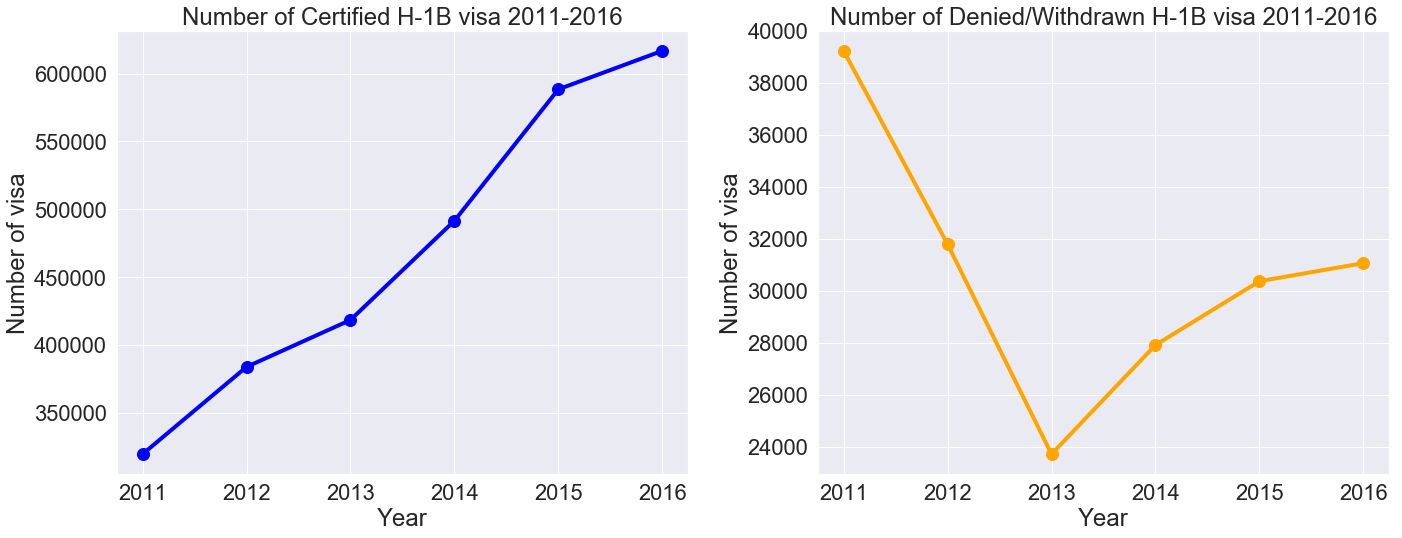

In [10]:
# Plotting H-1B case status data between 2011-2016
case_status=h1b[['CASE_STATUS','YEAR']]

plt.figure(figsize=(20,8))
sns.set(style="darkgrid")
plt.margins(x=0.0, y=0.0, tight=True)
sns.set(font_scale=2)

plt.subplot(1,2,1)
plt.plot(case_status[case_status['CASE_STATUS']=='CERTIFIED'].groupby('YEAR').count(), c='blue', lw=4, marker='o', markersize=12)
plt.title('Number of Certified H-1B visa 2011-2016')
plt.xlabel('Year')
plt.ylabel('Number of visa')
plt.tight_layout()

plt.subplot(1,2,2)
plt.plot(case_status[case_status['CASE_STATUS']=='DENIED/WITHDRAWN'].groupby('YEAR').count(), c='orange', lw=4, marker='o', markersize=12)
plt.title('Number of Denied/Withdrawn H-1B visa 2011-2016')
plt.xlabel('Year')
plt.ylabel('Number of visa')
plt.tight_layout()

plt.show()

The plots above show the number of Certified H-1B visa vs the number of Denied/Withdrawn H-1B visa from 2011-2016. We can clearly see that the number of approved applications increased remarkably over the year, while the number of denied applications fluctuated, with a big dip in 2013, but then gradually went up. 

One thing to keep in mind, the scale of the 2 plots are not the same. Even though the number of denied visa started to increase from 2013- 2016, this number is a lot smaller compare to the number of approved visa.

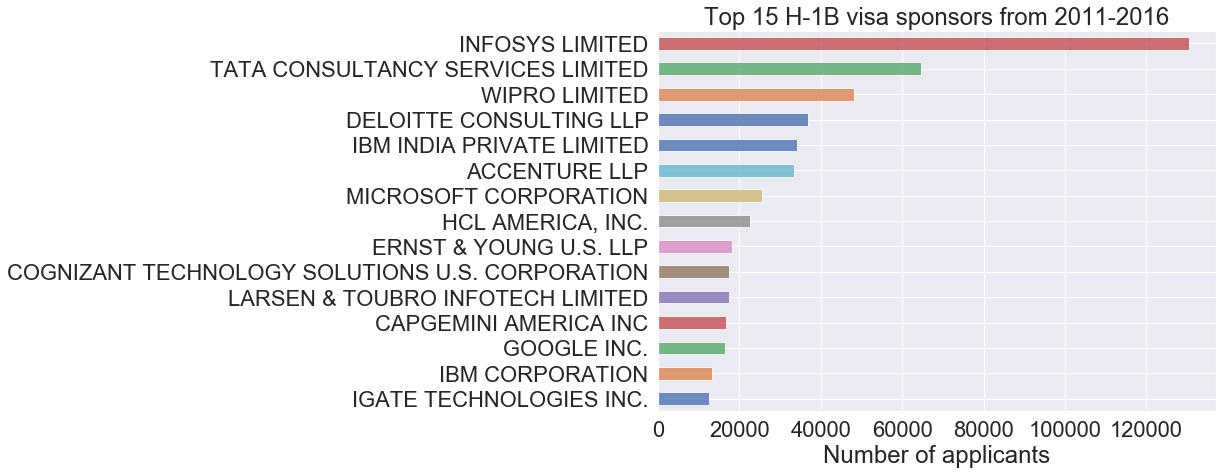

In [11]:
# Explore top sponsors/employersof H-1B petition: 
h1b['EMPLOYER_NAME'].value_counts().head(15).sort_values().plot(kind='barh', figsize=(10,7), alpha=0.8)
plt.title('Top 15 H-1B visa sponsors from 2011-2016')
plt.xlabel('Number of applicants')
plt.show()

The barchart above shows the top 15 H-1B visa sponsor in the U.S. from 2011-2016. Most of these employers operate in the Technology, Consulting or Financial industry. Leading the list is Infosys Limited, which filed about double the amount of the second runner-up(Tata Consultancy Services) within the 5-year period of analysis.

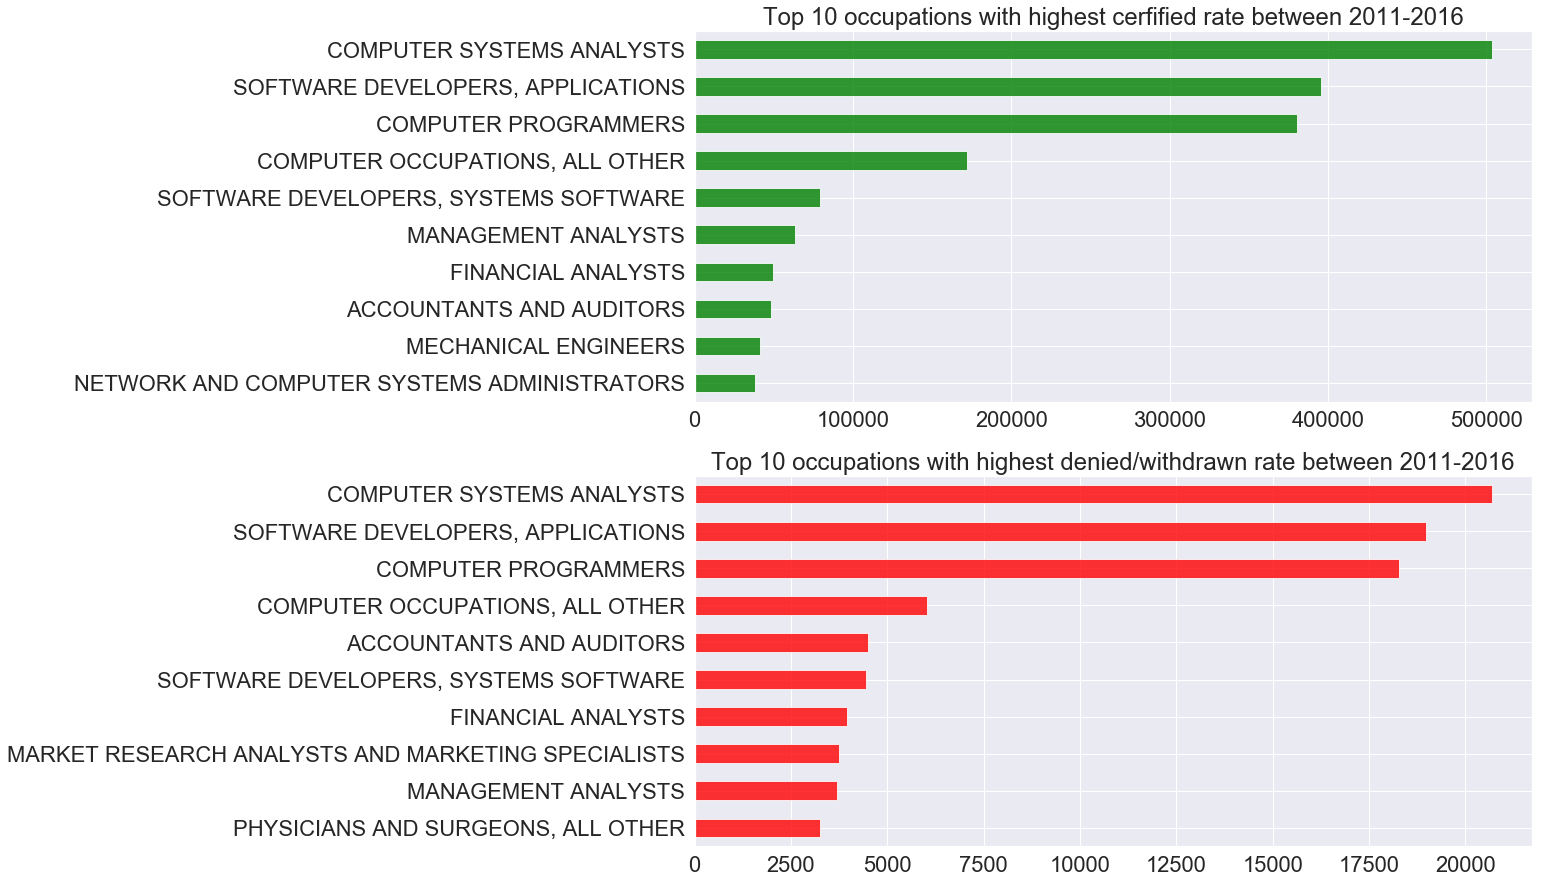

In [12]:
# Explore occupational data of sponsees:
# Split h1b data into 2 certified_h1b and denied_h1b dataframe:
certified_h1b = h1b[h1b['CASE_STATUS']=='CERTIFIED']
denied_h1b = h1b[h1b['CASE_STATUS']=='DENIED/WITHDRAWN']

# Plotting top 10 occupations with the highest visa approval rate and highest denial rate:
plt.figure(figsize=(15,15))

plt.subplot(2,1,1)
sns.set(font_scale=2)
certified_h1b['SOC_NAME'].value_counts().head(10).sort_values().plot(kind='barh',color='green', alpha=0.8)
plt.xlim=(0,500000)
plt.title('Top 10 occupations with highest cerfified rate between 2011-2016')

plt.subplot(2,1,2)
sns.set(font_scale=2)
denied_h1b['SOC_NAME'].value_counts().head(10).sort_values().plot(kind='barh', color='red', alpha=0.8)
plt.xlim=(0,500000)
plt.title('Top 10 occupations with highest denied/withdrawn rate between 2011-2016')

plt.show()

The 2 horizontal barcharts above display the top 10 occupations with the highest number of certified visa as well as the top 10 occupations with the highest denied/withdrawn visa between 2011-2016. Not surprisingly, most of the occupations with the highest number of approved H-1B visas are also the occupations with the highest denial H-1b rate. 

This is because while candidates for the H-1B visa are judged based on their credentials, education, and professional experience, every applicant is on even footing in the lottery system. The lottery draws from the pool of approved H1B applications randomly, with a general cap and a cap for advanced degree petitions. As the result, the occupations with the higher number of applicants also have a higher rate of denial.

In [13]:
# Explore location data: which states have the most H-1B visa applicants?
print(h1b[h1b['YEAR']==2016.0]['STATE'].value_counts().head(10))
print(h1b[h1b['YEAR']==2016.0]['STATE'].value_counts().tail(10))

 CALIFORNIA       119739
 TEXAS             68462
 NEW YORK          58668
 NEW JERSEY        48367
 ILLINOIS          35182
 MASSACHUSETTS     24890
 GEORGIA           24857
 PENNSYLVANIA      23380
 WASHINGTON        23149
 MICHIGAN          20970
Name: STATE, dtype: int64
 WEST VIRGINIA    618
 NA               571
 HAWAII           557
 NORTH DAKOTA     544
 VERMONT          366
 SOUTH DAKOTA     348
 PUERTO RICO      202
 ALASKA           199
 MONTANA          191
 WYOMING          137
Name: STATE, dtype: int64


It's not a surprise for me that California, Texas and new York have the highest number of H-1B applications as the majority of tech and financial jobs are in these states. Wyoming, Montana and Alaska on the contrary, have the lowest number of H-1B applications.

### Part 2 - Ask and answer Analytic questions:
----------------

#### Question 1: What is the wage distribution for the 10 most common jobs among high-applicant? What is the wage distributions among the 10 most common sponsors of H-1B visa?

In [14]:
# Print top 10 occupations with the highest visa approval rate:
top_occupations = certified_h1b['SOC_NAME'].value_counts().head(10).index
print(top_occupations)

# Print top 10 H-1B sponsors:
top_employers = certified_h1b['EMPLOYER_NAME'].value_counts().head(10).index
print(top_employers)

Index(['COMPUTER SYSTEMS ANALYSTS', 'SOFTWARE DEVELOPERS, APPLICATIONS',
       'COMPUTER PROGRAMMERS', 'COMPUTER OCCUPATIONS, ALL OTHER',
       'SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE', 'MANAGEMENT ANALYSTS',
       'FINANCIAL ANALYSTS', 'ACCOUNTANTS AND AUDITORS',
       'MECHANICAL ENGINEERS', 'NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS'],
      dtype='object')
Index(['INFOSYS LIMITED', 'TATA CONSULTANCY SERVICES LIMITED', 'WIPRO LIMITED',
       'DELOITTE CONSULTING LLP', 'ACCENTURE LLP', 'IBM INDIA PRIVATE LIMITED',
       'MICROSOFT CORPORATION', 'HCL AMERICA, INC.', 'ERNST & YOUNG U.S. LLP',
       'LARSEN & TOUBRO INFOTECH LIMITED'],
      dtype='object')


In [15]:
# Create top_sponsee dataframe for 2016:
top_sponsee = pd.DataFrame()
for occupation in top_occupations:
    top_sponsee = top_sponsee.append(h1b[h1b['SOC_NAME']==occupation]) 
top_sponsee = top_sponsee[top_sponsee['FULL_TIME_POSITION']=='Y']
top_sponsee = top_sponsee[top_sponsee['YEAR']== 2016.0]

# Create top_sponsor dataframe for 2016:
top_sponsor = pd.DataFrame()
for employer in top_employers:
    top_sponsor = top_sponsor.append(h1b[h1b['EMPLOYER_NAME']==employer]) 
top_sponsor = top_sponsor[top_sponsor['FULL_TIME_POSITION']=='Y']
top_sponsor = top_sponsor[top_sponsor['YEAR']== 2016.0]

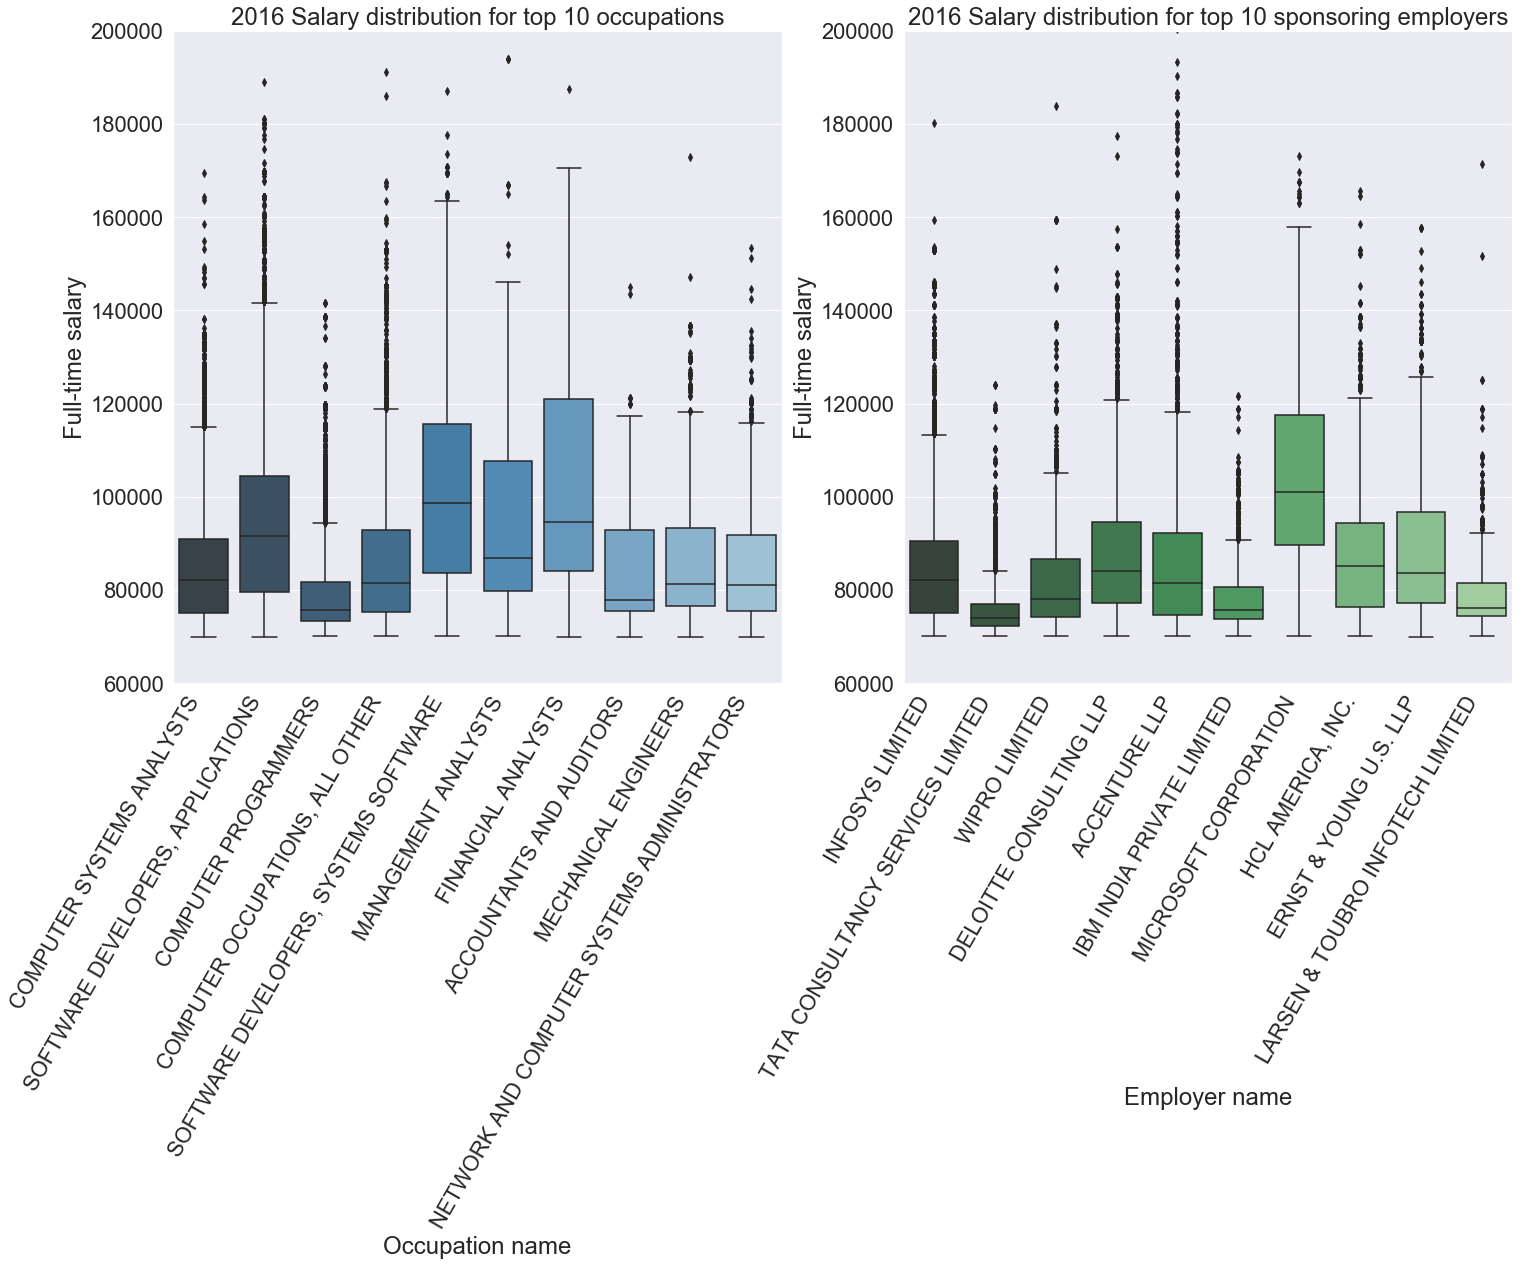

In [16]:
plt.figure(figsize=(24,12))

# Plotting 2016 salary distribution for top 10 occupations 
plt.subplot(1,2,1)
sns.set(font_scale=2)
chart1=sns.boxplot(x='SOC_NAME', y='PREVAILING_WAGE', data=top_sponsee, palette="Blues_d")
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.ylim(60000,200000)
plt.title('2016 Salary distribution for top 10 occupations')
plt.xlabel('Occupation name')
plt.ylabel('Full-time salary')

# Plotting 2016 salary distribution for top 10 sponsoring employers
plt.subplot(1,2,2)
sns.set(font_scale=2)
chart2=sns.boxplot(x='EMPLOYER_NAME', y='PREVAILING_WAGE', data=top_sponsor, palette="Greens_d")
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.ylim(60000,200000)
plt.title('2016 Salary distribution for top 10 sponsoring employers')
plt.xlabel('Employer name')
plt.ylabel('Full-time salary')

plt.show()

As we can see from the first chart on the right, Software Developers, systems software had the highest median salary in 2016. Financial analyst jobs had the second highest median salary, however, also had the widest salary spread. Computer Programers, on the other hand, earned the least in 2016 for H-1B applicants.

The second boxplot on the right shows the 2016 salary distribution paid by top 10 H-1B sponsors. As displayed in the chart, Microsoft paid H-1B applicants significantly higher than others, with a median of above 100k, while Tata Consultancy paid the least in 2016.

#### Question 2: What is the number of certified H-1B visa for Data science-related jobs from 2011-2016? 

In [17]:
# Filtering full-time data science-related jobs from h1b:
data_science =h1b[h1b['JOB_TITLE'].str.contains('DATA SCIENTIST', na=False)]
data_science = data_science.append(h1b[h1b['JOB_TITLE'].str.contains('DATA ENGINEER', na=False)]) 
data_science = data_science.append(h1b[h1b['JOB_TITLE'].str.contains('MACHINE LEARNING', na=False)]) 
data_science = data_science[data_science['FULL_TIME_POSITION']=='Y']

data_science['TITLE']='DATA SCIENCE RELATED JOB'
data_science.drop('JOB_TITLE', axis=1, inplace=True)
ds_job = data_science[['PREVAILING_WAGE','YEAR']]

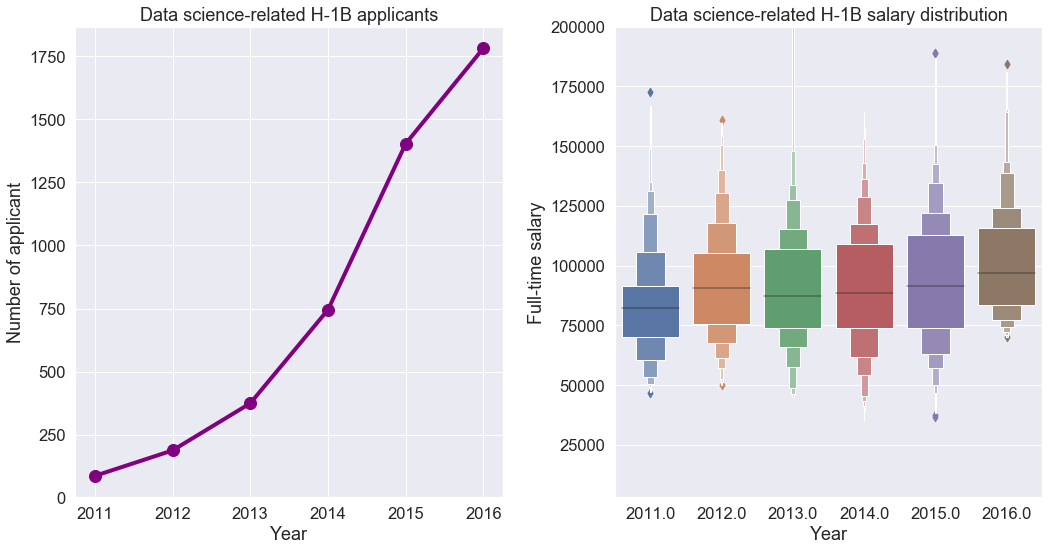

In [18]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)

# Plotting the amount of H-1B applicants with data science-related jobs from 2011-2016:
plt.subplot(1,2,1)
plt.plot(ds_job.groupby('YEAR').count(), c='purple', lw=4, marker='o', markersize=12)
plt.title('Data science-related H-1B applicants')
plt.xlabel('Year')
plt.ylabel('Number of applicant')

# Plotting salary distribution of data science-related H-1B applicants:
plt.subplot(1,2,2)
chart= sns.boxenplot(x=ds_job['YEAR'], y=ds_job['PREVAILING_WAGE'])
plt.ylim(3000,200000)
plt.title('Data science-related H-1B salary distribution')
plt.xlabel('Year')
plt.ylabel('Full-time salary')

plt.tight_layout()

As indicated from the 2 plots above, the number of data H-1B applicants with science-related jobs increased significantly from year to year, especially from 2014 to 2015. This is explicable since Data science is a new, 'hot' field in the tech industry , and there has been increasingly high demand for data science-related jobs in the U.S. The median salary for H-1B applicants with science-related jobs also increased slowly from 2011-2016, as shown in the boxplot.

#### Question 3: H-1B petitions in Utah from 2011-2016?

In [19]:
# Filter h1b dataframe to only include Utah data:
utah = h1b[h1b['STATE']==' UTAH']
utah.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,CITY,STATE
199,DENIED/WITHDRAWN,"SNAPRAYS, LLC",CHIEF EXECUTIVES,CHIEF EXECUTIVE OFFICER,N,66373.0,2016.0,PROVO,UTAH
202,CERTIFIED,"PURCH GROUP, INC.",CHIEF EXECUTIVES,SENIOR VICE-PRESIDENT & GENERAL MANAGER,Y,156104.0,2016.0,OGDEN,UTAH
235,DENIED/WITHDRAWN,"SNAPRAYS, LLC",CHIEF EXECUTIVES,CHIEF EXECUTIVE OFFICER,N,66373.0,2016.0,PROVO,UTAH
236,DENIED/WITHDRAWN,"SNAPRAYS, LLC",CHIEF EXECUTIVES,CHIEF EXECUTIVE OFFICER,N,66373.0,2016.0,PROVO,UTAH
238,DENIED/WITHDRAWN,"SNAPRAYS, LLC",CHIEF EXECUTIVES,CHIEF EXECUTIVE OFFICER,N,66373.0,2016.0,PROVO,UTAH


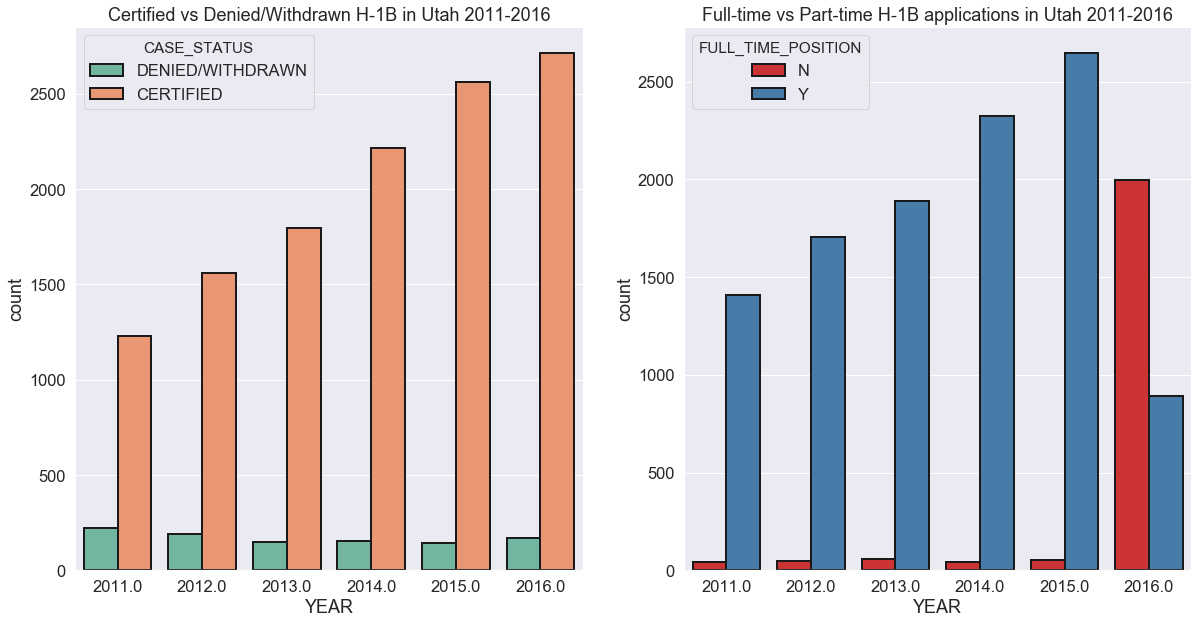

In [20]:
plt.figure(figsize=(20,10))

# Plotting the certified vs denied/withdrawn H-1B rate in Utah from 2011-2016:
plt.subplot(1,2,1)
sns.countplot(x="YEAR", hue="CASE_STATUS", palette="Set2", data=utah, linewidth=2, edgecolor="k")
plt.title('Certified vs Denied/Withdrawn H-1B in Utah 2011-2016')

# Plotting full-time vs part-time H-1B applicants in Utah from 2011-2016:
plt.subplot(1,2,2)
sns.countplot(x="YEAR", hue="FULL_TIME_POSITION", palette="Set1", data=utah, linewidth=2, edgecolor="k")
plt.title('Full-time vs Part-time H-1B applications in Utah 2011-2016')

plt.show()

The 2 barplots above compare H-1B case status and the job status in the state of Utah between 2011-2016. While the number of approved H-1B visa increased gradually from 2011-2016 in Utah, the number of denied/withdrawn applications stayed quite stable. Most of the time, employers sponsored full-time international workers. However, in 2016, we see a reversed trend, where companies sponsored almost double not-full-time employees than full-time employees.

### Part 3 - Propose further research
-------------

#### Scrape and collect 2017-2019 H-1B petition data in order to expand the current dataset. 
For further researching, I'd like to collect more data for current years (scrapping H-1B data from 2017-2019) to exxpand the current data set and re-run my analysis to see the changes in visa petition data in recent years. This can convey interesting trends and messages, since it would reflect the different immigration policies between 2  political administrations (the Obama and the Trump administration). 

#### Predict H-1B visa status based on multiple variables (Occupation code, Employer name, City, State, Salary)
I would like to further my H-1B research by creating a machine learning engine to predict H-1B status for applicants based on multiple variables. For example, based on the applicant's occupation code, employer name, city of work, state of work and salary level, the machine learning algorithm can predict whether the applicant will receive a certified or a denied/withdrawn case-status. 